In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [11]:
def MLP(X_train, Y_train):
    model = Sequential()
    model.add(Dense(512, activation="relu", input_shape=((X_train.shape[1]),), name="inputs"))
    model.add(Dropout(0.3))
    model.add(Dense(512, activation="relu", name="D1"))
    model.add(Dropout(0.3))
    model.add(Dense(Y_train.shape[1], activation="softmax", name="outputs"))
    
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

def preprocess_mnist_data(X_train, Y_train, X_test, Y_test):
    X_train = X_train.reshape(60000, 784)
    X_test = X_test.reshape(10000, 784)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    return (X_train, Y_train), (X_test, Y_test)

def train_model(model, epochs, batch_size):
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=2)
    return history

def visual_train_status(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    epochs = range(1, len(loss)+1)
    
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.plot(epochs, loss, "bo-", label="Training Loss")
    plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()    
    plt.subplot(122)
    plt.plot(epochs, acc, "bo-", label="Training Acc")
    plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

In [12]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = preprocess_mnist_data(X_train, Y_train, X_test, Y_test)

model = MLP(X_train, Y_train)
model.summary()

history = train_model(model, epochs=3, batch_size=128)

loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (Dense)               (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
D1 (Dense)                   (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
outputs (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 - 4s - loss: 0.3009 - accuracy: 0.9099 - v

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


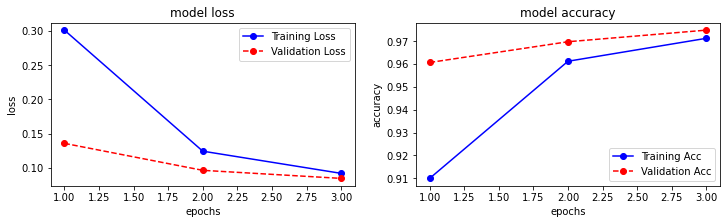

In [26]:
print(history.history.keys())
visual_train_status(history)